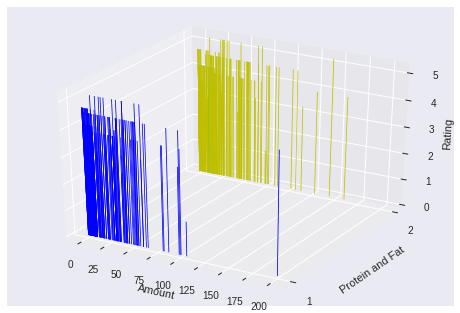

In [3]:
import os
import sys
import matplotlib.pyplot as plt
from matplotlib import mlab
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 


# LOGISTIC REGRESSION CLASSIFICATION VARIABLES
testDataSize = 30 # DO NOT TOUCH: amount of recommended food items outputted (keep under 10% of total)
inputSize = 4 # DO NOT TOUCH: num of food item categories for classification
numClasses = 2 # DO NOT TOUCH: num of food classification classes (like/dislike)
numEpochs = 30 
trainBatchSize = 20
testBatchSize = 15
learningRate = 0.0001
likeWeight = 1.05  # added weight to mean rating value for cutoff point

# LINEAR REGRESSION VARIABLES
linDataSize = 200 # DO NOT TOUCH: amount of data used for lin reg training (prevents overfitting)
linNumEpochs = 250
linLearningRate = 0.01

# VISUALIZATION VARIABLES
dataSize = 200

# LAMBDA FUNCTIONS
# Function Description: reduces data from raw data to data amount per calories ratio (protein, fat, sodium)
def quantityToRatio(row, option):
    calories = row['calories']
    if calories > 0:
        return (row[option] / calories)
    else:
        return row[option]
  
# Function Description: provides much needed variety within rating category - preprocessing
def adjustRating(row, calories, overUnder):
    rating = row['rating']
    if overUnder == "Gain":
        if row['calories'] >= calories:
            rating = rating * 1.05
        else:
            rating = rating * .95
    else:
        if row['calories'] <= calories:
            rating = rating * 1.05
        else:
            rating = rating * .95
    
    return rating

  
# READ DATA + PREPROCESS
data = pd.read_csv("epi_r.csv", encoding = 'utf8')
df = data[['title','rating','calories','protein','fat','sodium','kosher','pescatarian','vegan','vegetarian', 'dairy free','egg','tree nut free','peanut free','shellfish', 'soy free','fish','wheat/gluten-free','sugar conscious']]
df.replace(r'\s+', np.nan, regex=True)
df.replace('', np.nan, regex=True)
df.reset_index(level=0, inplace=True)
df = df.dropna() # rids of all NAN rows - unable to be used

# APPLY FILTER OR NOT
#df['protein'] = df.apply(lambda row: quantityToRatio (row, "protein"),axis=1)
#df['fat'] = df.apply(lambda row: quantityToRatio (row, "fat"),axis=1)
df['sodium'] = df.apply(lambda row: quantityToRatio (row, "sodium"),axis=1)

# PREPROCESS
df = df.sample(frac=1).reset_index(drop=True)
df = df[['rating','calories','protein','fat','sodium','sugar conscious']]
df['rating'] = df.apply(lambda row: adjustRating(row, df['calories'].median(), 'Gain'),axis=1)
df = df[:dataSize]

#################

figure = plt.figure()
plot = figure.add_subplot(111, projection='3d')

thisdf = df['protein'].values
thatdf = df['rating'].values

colors = ['b', 'y'] # COLORS OF PLOT
yticks = [1, 2]
li = ['protein', 'fat'] # LIST OF COLUMNS TO DISPLAY
lic = 0 # LIST COUNTER

for c, y in zip(colors, yticks):
    what = df[li[lic]].values
    lic = lic + 1
    xs = what.tolist()
    ys = thatdf.tolist()

    cs = [c] * len(xs)
    cs[0] = 'c'

    plot.bar(xs, ys, zs=y, zdir='y', color=cs, alpha=1.0)

plot.set_xlabel('Amount')
plot.set_ylabel('Protein and Fat')
plot.set_zlabel('Rating')
plot.set_yticks(yticks)

plt.show()